# Implementation of Logistic Regression on 'Titanic Dataset' from kaggle
We all are aware about the history of Titanic being sinked and making it one of the tragic incidence in the past.

Here, with the help of the given dataset we would try to find the prediction wheather a person onboard Titanic had survived or not.

This dataset have many factors like age, Passenger class, gender to check for the survival.

Here in this dataset, we are having semicleaned data which is fetched through kaggle.

The survival prediction here would be performed with the implementation of Logical Regression which is a robust method to give prediction for binary input.

Here the logical regression isused as it is one of the best and reliable model for predicting the outcome out of two choices.

Here we need to predict whether a passenger survived or not thus Logical regression is a basic choice for this prediction.

# Import Libraries and fetching Data 

To get started with the predicting model we will import some libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Fetch data from the csv sheet

The csv sheet for dataset used here is fetched from global community 'kaggle'

In [2]:
titanic= pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analyse the titanic data for predicting survival of passengers

In [3]:
titanic.shape

(418, 12)

here we used .shape to get information about the size of rows and column which depict for how many people we are having the dataset and how many factors we got to predict the survival.

We get to know that the information is given for 418 people and there are 12 distinguishing factors present.

# Visualising the dataset
Here we are using seaborn plots for visualising the survival over different aspects.

Also we are visualising the survived and deseased people

<Axes: xlabel='Survived', ylabel='count'>

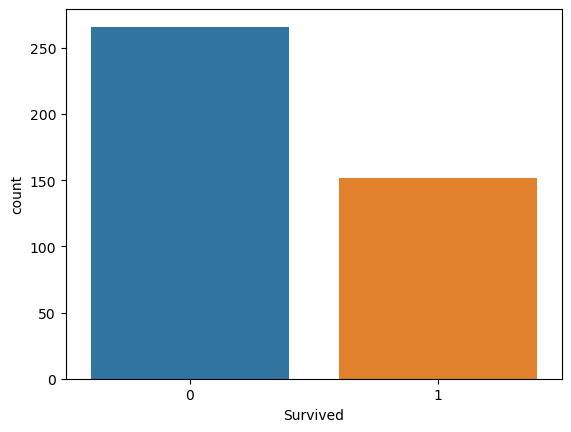

In [4]:
sns.countplot(x='Survived',data=titanic)

This is graphical representation of people who survived (represented by 1) and not able to survived ( represented by 0)

Here we can see that 63% people were not able to survived and lost thier life.

In [5]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

The total number of passengers are 418 out of which number of survivals are 152 and 266 casualitites.

This depicts that there were not even 40 percent of people who survived the incidence.

<Axes: xlabel='Survived', ylabel='count'>

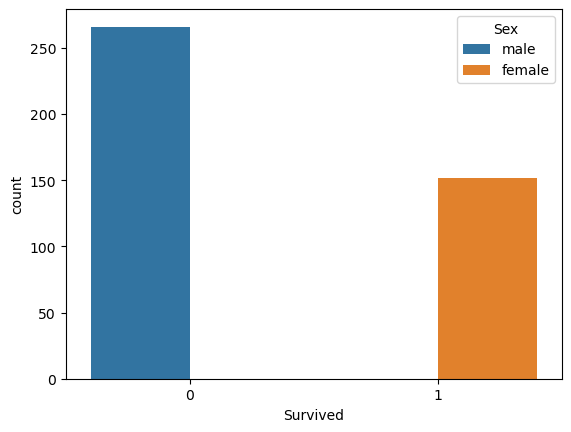

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

This graph is a visual representation which indicates the number of male and female who got survived and was not able to survive in the whole incoidence

We can see that all the casualties are from male division which comes out to conclusion that all the women onboard were protected and saved. 

This incidence tells that the female survives during the evacuation process as females and minors are evacuated first.


# Graphical representation of distinguishing people on the basics of their class and Age 

<Axes: xlabel='Survived', ylabel='count'>

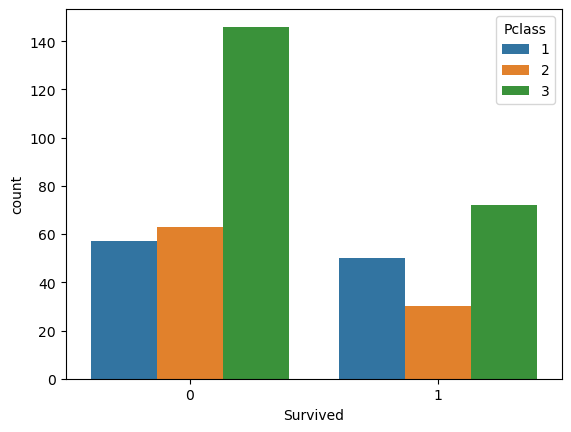

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

### Here with the data we can see that there were three classes in which passengers were divided .
These 3 classes are divided in accordance to the fair they paid for the cruise
There are three class in which people were able to choose their stays in titanic This graph gives a visualisation of people from each classes who survived and were not able to survive.

From this visualisation we can see that the most survived passengers were from Class 1 which is obvious as they paid more and were more important

Also this depicts that most of the died passengers belonged from the class 3.

### analysing the age group

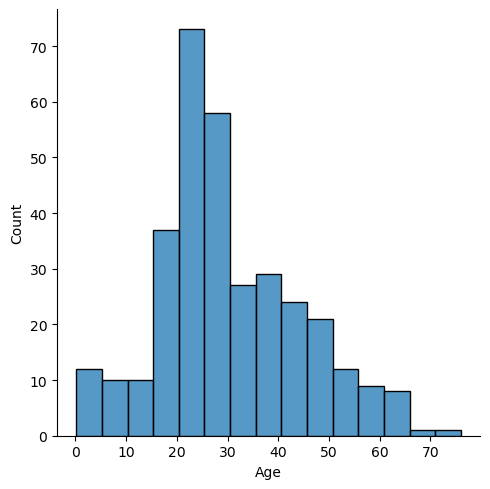

In [8]:
sns.displot(titanic['Age'].dropna())

Here we can see that the major people onboard belonged to the age group of 20 to 30 years.

This is kind of obvious as this titanic cruise was supposed to one of the first adventurous voyage attracting a huge number of young people looking for exciting journey.

<Axes: xlabel='SibSp', ylabel='count'>

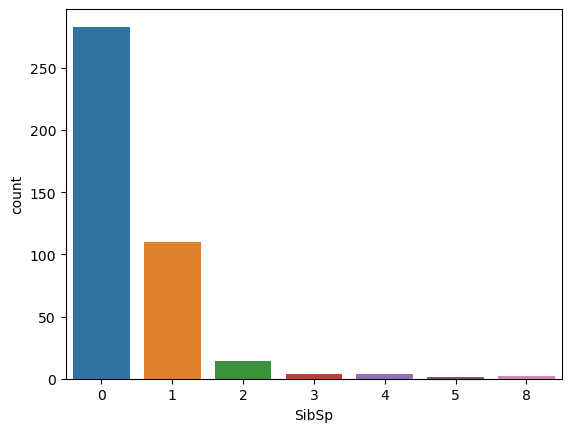

In [9]:
sns.countplot(x='SibSp',data=titanic)

The visualisation of 'SibSp' column depits the people who were on the titanic with their sibling or with their spouse

This directly depicts the people who are on the family trip or for a adventurous tour with their partner or were on the titanic for some adventure on their own.

This indicated that the major number of people around 300 were not having any sibling or with spouse on the trip.

### Fare distribution analysis

<Axes: ylabel='Frequency'>

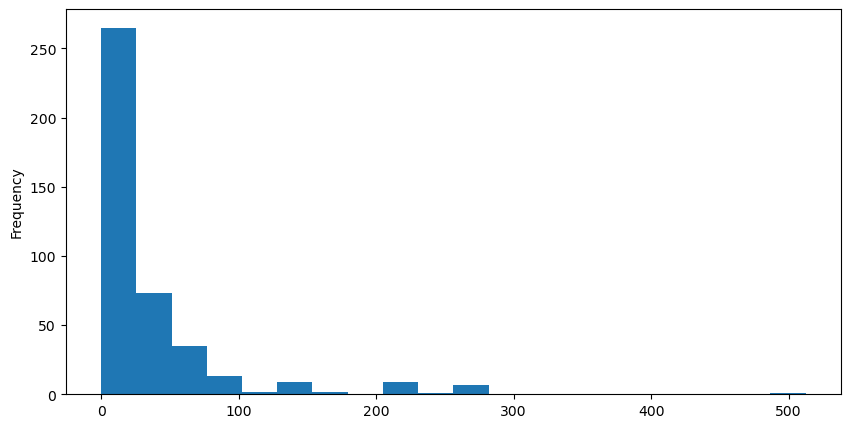

In [10]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))


This is the representation of people with the fare range 

clearly, the upper class paying high fare was very low as compare to the people paying less fair i.e belonging to the economical class.

Here, with this plot we can conclude that most number of passengers were travelling with the minimum fare range which was less than $100.

Also there were passengers who had spent a lot to be on that trip.

This shows that there were very less people belonging to Class 1.

# Analysing and modifying data for prediction

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here 'age' and 'cabin' have the most null values so we will remove these as these are of no use for the training and testing of model

<Axes: >

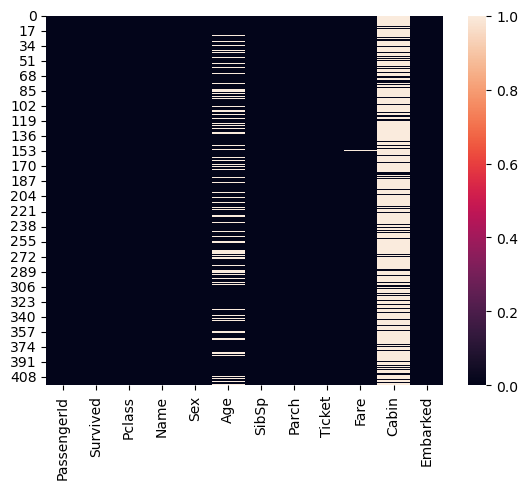

In [12]:
sns.heatmap(titanic.isnull())

Representing null spaces for clear visualization and understanding.

We can see that more than 20 percent of age data is missing and roughly 77 percent is missing in cabin rows.

## Data cleaning and dropping

####  As we can see the 'Age' and 'Cabin' have null values so we will drop these out of the data 

##### We can simply drop the row by using '.drop()' method

In [13]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.drop('Age', axis=1, inplace=True)

In [14]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


#### We intend to check the heat map again to make sure that our function worked successfully
This heat map shows the null values for each specific column

<Axes: >

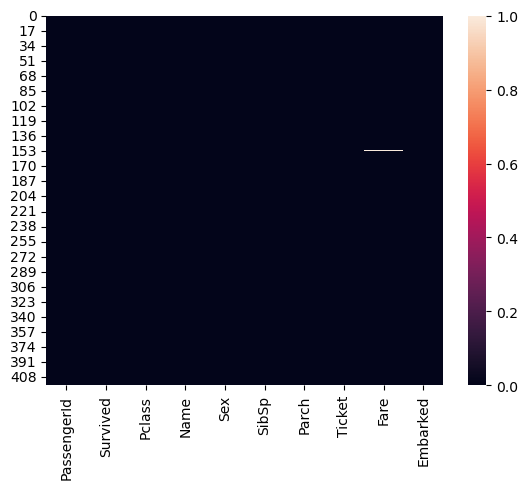

In [15]:
sns.heatmap(titanic.isnull())

We can see that our function is working properly and age and cabin rows are removed from the dataset so that we can easily train the model 

### Converting and Clarifyig the factors in terms of (1,0)

####  As we know there are only female survivors and no male survived so we need to clasify the data on the basis of 'Sex' , so transform the sex into (1,0) where 1 means male and 0 means female 

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
titanic['Sex']= labelencoder.fit_transform(titanic['Sex'])

 importing labelencounter for tranforming sex (male and female) into (1,0) 

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S


# Building and training a Logistic Regressing Model
As for regression we need to first train and test the data which makes it necessary to divide the data for training and testing purpose.

the procedure further goes to train for getting the accuracy which is acceptable.

##  Training the model 

Training is done by working out the model on the given data set for a specific proportion of data and then testing the model for accurate outcomes on the remainning data.

We can train model on any amount of data but for general and reliable models we tend to maximise tge training data



In [18]:
X=titanic[['Pclass', 'Sex']]
Y= titanic['Survived']

as we wish to predict the survival only through passenger class and their sex column

####  Slpiting the data for training and testing 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.3, random_state= 0)

We can split the data in any ratio for testing and training.

Here are used 30 percent of the data for testing and the remaining for training purpose i.e. 70 percent data is used as training data.

This means the data would be trained by this 70% and would be tested on the remaining 30% dataset.

## Logistic Regression for training the model


###### Here we used logistic regression to train the model as it is robust with (0,1)(binary response).
Here we used the spliited set of test and training for training the model.

In [20]:
from sklearn.linear_model import LogisticRegression
Mod= LogisticRegression(random_state = 0)
Mod.fit(X_train, Y_train)

LogisticRegression(random_state=0)

Also, the Mod is the object we used for storing the logical regression model.

Here we will now be able to predict the survival by using the regression.

For that we used ".predict()" to do the prediction of X axis test and also to cross verify we did Y test as well.

In [21]:
prediction= Mod.predict(X_test)

Here we used ".predict()" method to get the prediction and passed the X test array.

Which gives us the survival of all onboard passengers in terms of 0 and 1 where 1 means that the passenger survived.

In [22]:
print(Mod.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0]


In [23]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
81     0
107    0
366    0
414    1
297    0
Name: Survived, Length: 126, dtype: int64


For checking the prediction being true, we check for y test

This ensures thatb we had the same result in x test as in y test.

Altough these test caan be checked for accuracy and the predictions can be generated by confusion matrix which is byfar imported from sklearn for specifically predicting out the arrays

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(Y_test, prediction)

array([[71,  0],
       [ 0, 55]], dtype=int64)

This depicts that the difference of x and y test are in the following points.

for example through the array obtained from confusion matrix we get to know that survival of passenger listed at 71 , 55 and so on are not currectly predicted.

# Accuracy check
This Block is used for checking the accuracy of Y test which gives the accuracy of model in predicting the survival.

Above we even had the list of whole survived passengers in (0,1) format but that can not be used for predicting each as a whole.

So as to find the Model relevance we had the accuracy score which can be easily imported from sklearn and can be used for the same

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(Y_test, prediction)

1.0

This model is acurate by 1.0 this means for a data set it would give correct prediction for 100 out of 100 times for sure.

This means the accuracy is more 100% for this model.

This implies that the model is in best of its state and also depends on the training and testing data 

## Evalution
We can check precision by using classification report.

It is a visualiser which displays the scores of different criteria to check the prediction accuracy of the model and works as a performance evaluation metric.

It is used to measure the quality of predictions from a classification algorithm.

Here we can use the prediction of Y test to get a detailed report consisting of recall rate, precision and f1- score.

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Classification report
This summarizes the quality of classification and accuracy of the model being constructed. The listed classification holds the value on the below defined defination.

Precision: It is calculated with respect to the predicted values.

Recall: It is calculated with respect to the actual values in dataset.

F1-score: It is the harmonic mean of precision and recall.

Support: It is the total entries of each class in the actual dataset.

## Conclusion and Understandings
The above model made us understand that we can be reliable on this model for predicting the survival ofr passengers for this specific data as here only female survives. Also the accuracy is 100% which is because of the type of data we are provided with.

While making this model, we get to know and understand about the dataset on which we were working and found some interesting insights and observations.

###### The observations are as follows:
The surviving passengers were overall consist of only women and there were 152 women onboard.

The surving passengers mostly belonged to the class 3 that means there were mostly people who bought tickets for class 3.

The evacuation process focussed more on the women and children as all the casualties were 266 men.

The most passengers lost their lives belongs to class 3 that means the people tends to belonging to economical class were ignored in comparison to other upper class.

The next observation is that most people present on that incidence were belonging from the age group of 20 to 30 years.